<a href="https://colab.research.google.com/github/RiteshLakhe/RiteshLakhe/blob/main/Ritesh_Lakhe_2405336.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# connect to the google drive
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [ ]:
# import the necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# **Classification**

In [ ]:
# read the dataset
phone_data = pd.read_csv('/content/drive/MyDrive/AI Final Assignment/phone_dataset.csv')

**Introduction**

**Choose: Load and Inspect you Data**

**1. When and who created the Dataset?**


This dataset was created by Bob. The dataset was created at 2018.

**2. How did you get acess to the datset?**

This dataset was accessed from kaggel, a platfrom that host diverse dataset and competitions related to data science and machine leraning. https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification


**3. List out the atributes (columns) of the dataset.**

1. battery_power
2. blue
3. clock_speed
4. dual_sim
5. fc
6. four_g
7. int_memory
8. m_dep
9. mobile_wt
10. n_cores
11. px_height
12. px_width
13. ram
14. sc_h
15. sc_w
16. talk_time
17. three_g
18. touch_screen
19. wifi
20. price_range

**initial Inspection of the dataframe**

In [ ]:
# list the column name of the data frame
columns = phone_data.columns
print(f"columns:\n{columns}")

columns:
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [ ]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#calculate the total memory usage of the dataset, with deep memory usage.
total_memory = phone_data.memory_usage(deep=True).sum()

#finding number of rows and columns in the dataset
num_rows, num_cols = phone_data.shape

#calculates total number of elements
size = phone_data.size

print("Number of Rows: ", num_rows)
print("Number of Columns: ", num_cols)
print("The total datasize is ", size)
print("Total memory usage (bytes): ",total_memory)

Number of Rows:  2000
Number of Columns:  21
The total datasize is  42000
Total memory usage (bytes):  336132


**Data Type of each column**

In [ ]:
#finding the data types of each column
data_type= phone_data.dtypes
print("Data types of Each Column:")
print(data_type)

Data types of Each Column:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [ ]:
phone_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


from matplotlib import pyplot as plt
_df_37['battery_power'].plot(kind='hist', bins=20, title='battery_power')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['blue'].plot(kind='hist', bins=20, title='blue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['clock_speed'].plot(kind='hist', bins=20, title='clock_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['dual_sim'].plot(kind='hist', bins=20, title='dual_sim')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='battery_power', y='blue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='blue', y='clock_speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='clock_speed', y='dual_sim', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='dual_sim', y='fc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['battery_power']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('battery_power')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['blue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('blue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['clock_speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('clock_speed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['dual_sim']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_48.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('dual_sim')

from matplotlib import pyplot as plt
_df_49['battery_power'].plot(kind='line', figsize=(8, 4), title='battery_power')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['blue'].plot(kind='line', figsize=(8, 4), title='blue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['clock_speed'].plot(kind='line', figsize=(8, 4), title='clock_speed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['dual_sim'].plot(kind='line', figsize=(8, 4), title='dual_sim')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
phone_data.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


from matplotlib import pyplot as plt
_df_53['battery_power'].plot(kind='hist', bins=20, title='battery_power')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54['blue'].plot(kind='hist', bins=20, title='blue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55['clock_speed'].plot(kind='hist', bins=20, title='clock_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56['dual_sim'].plot(kind='hist', bins=20, title='dual_sim')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x='battery_power', y='blue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58.plot(kind='scatter', x='blue', y='clock_speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='clock_speed', y='dual_sim', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60.plot(kind='scatter', x='dual_sim', y='fc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['battery_power']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_61.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('battery_power')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['blue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_62.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('blue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['clock_speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_63.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('clock_speed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['dual_sim']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_64.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('dual_sim')

from matplotlib import pyplot as plt
_df_65['battery_power'].plot(kind='line', figsize=(8, 4), title='battery_power')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_66['blue'].plot(kind='line', figsize=(8, 4), title='blue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_67['clock_speed'].plot(kind='line', figsize=(8, 4), title='clock_speed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68['dual_sim'].plot(kind='line', figsize=(8, 4), title='dual_sim')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print("Data types of each variable:\n")
print(phone_data.dtypes)

Data types of each variable:

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


**Data Cleaning**

checking the null values

In [ ]:
# Calculate the mean of each column
column_means = phone_data.mean()

# Fill null values with the mean of the respective columns
phone_data = phone_data.fillna(column_means)

# again find the null value
null_values = phone_data.isnull().sum()
print(null_values)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Check the duplicate

In [ ]:
duplicate_data = phone_data.duplicated().sum()
print(duplicate_data)

0


Summary Statistics numerical

In [ ]:
# Select numeric columns
numeric_columns = phone_data.select_dtypes(include='int')

numeric_summary = phone_data.describe()

# additional statistics
range_values = numeric_columns.max() - phone_data.min()
variance_values = numeric_columns.var()

# Add the calculated values to the numeric_summary DataFrame
numeric_summary.loc['range'] = range_values
numeric_summary.loc['variance'] = variance_values


# Display the updated summary
print("Summary Statistics for Numeric Columns:")
print(numeric_summary)

Summary Statistics for Numeric Columns:
          battery_power       blue  clock_speed     dual_sim           fc  \
count       2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean        1238.518500     0.4950     1.522250     0.509500     4.309500   
std          439.418206     0.5001     0.816004     0.500035     4.341444   
min          501.000000     0.0000     0.500000     0.000000     0.000000   
25%          851.750000     0.0000     0.700000     0.000000     1.000000   
50%         1226.000000     0.0000     1.500000     1.000000     3.000000   
75%         1615.250000     1.0000     2.200000     1.000000     7.000000   
max         1998.000000     1.0000     3.000000     1.000000    19.000000   
range       1497.000000     1.0000          NaN     1.000000    19.000000   
variance  193088.359838     0.2501          NaN     0.250035    18.848134   

               four_g   int_memory        m_dep    mobile_wt      n_cores  \
count     2000.000000  2000.000000 

**univariate Analysis**

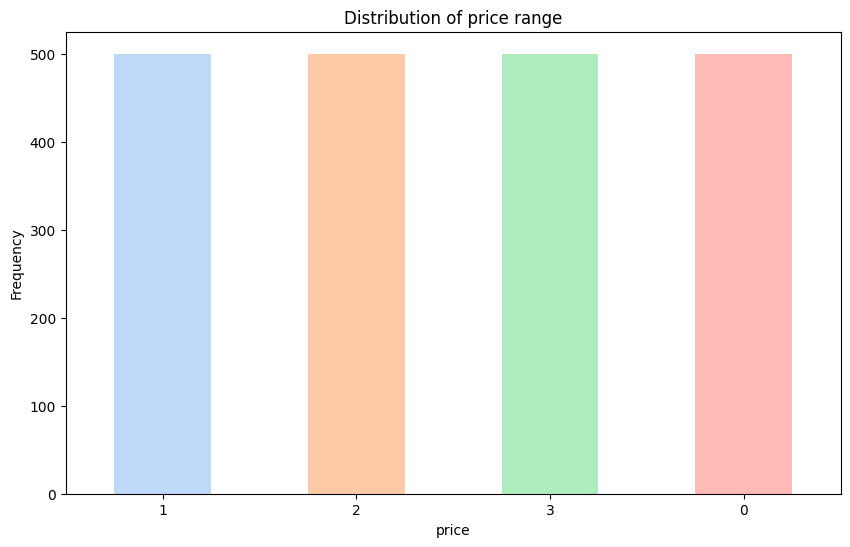

In [ ]:
# Count the frequency of price
price_group_counts = phone_data['price_range'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')
price_group_counts.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Distribution of price range')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


The provided code snippet is designed to analyze the distribution of price ranges in a dataset called phone_data. It starts by counting the frequency of each price range category using the value_counts() method applied to the 'price_range' column of the DataFrame. This creates a Series object called price_group_counts, where each unique price range value is associated with the number of occurrences in the dataset.

Next, a bar plot is created to visualize the distribution of price ranges. The plt.figure(figsize=(10, 6)) line sets the figure size to 10x6 inches, providing a suitable aspect ratio for the plot. The sns.color_palette('pastel') function is used to generate a palette of pastel colors, which are assigned to each bar in the plot. The kind='bar' parameter specifies the type of plot to create.

Skewness of price distribution: 0.0


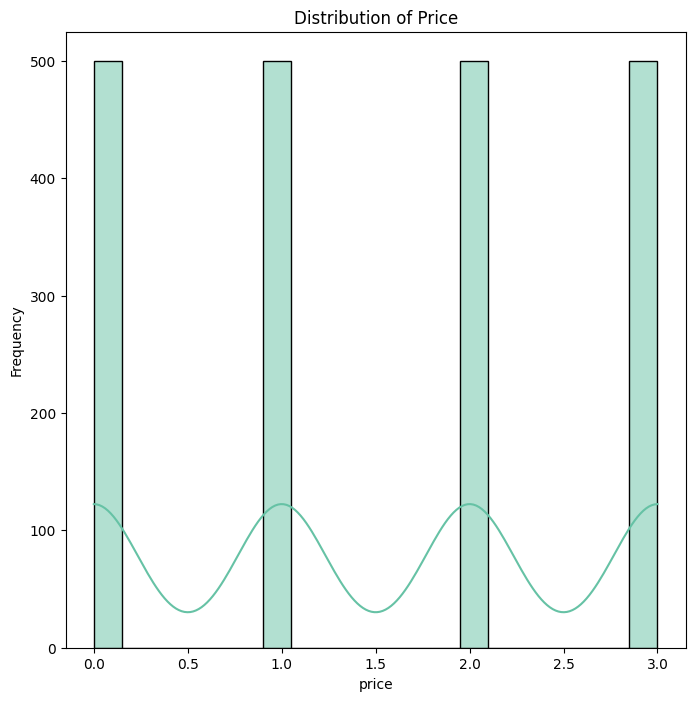

In [ ]:
# Calculate skewness of price range
skewness_price = phone_data['price_range'].skew()
print("Skewness of price distribution:", skewness_price)

# Measure skewness
plt.figure(figsize=(8, 8))
custom_palette = sns.color_palette('Set2')
sns.histplot(phone_data['price_range'], bins=20, kde=True, color=sns.color_palette('Set2')[0])
plt.title('Distribution of Price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()




The provided code snippet calculates the skewness of the 'price_range' variable in the 'phone_data' dataset and then visualizes its distribution using a histogram plot with a kernel density estimate (KDE). Skewness provides insight into the asymmetry of the distribution, while the histogram with KDE overlay offers a visual representation of the frequency distribution of price ranges. This analysis aids in understanding the data's characteristics and identifying any potential skewness or patterns within the 'price_range' variable.

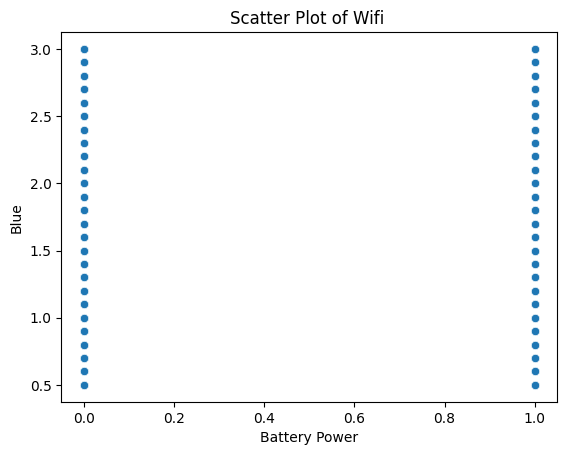

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=phone_data, x='wifi', y='clock_speed')
plt.title('Scatter Plot of Wifi ')
plt.xlabel('Battery Power')
plt.ylabel('Blue')
plt.show()


The scatter plot in the 'phone_data' dataset shows the relationship between 'wifi' and 'clock_speed' features. It indicates if there is a clear pattern or correlation between the two features. If points cluster around a straight line or form distinct groups, it suggests a relationship. If no pattern is present, it indicates little to no relationship. The plot's title, x-axis label ('Wifi') and y-axis label ('Clock Speed'), provides context and insights into the association between these variables.

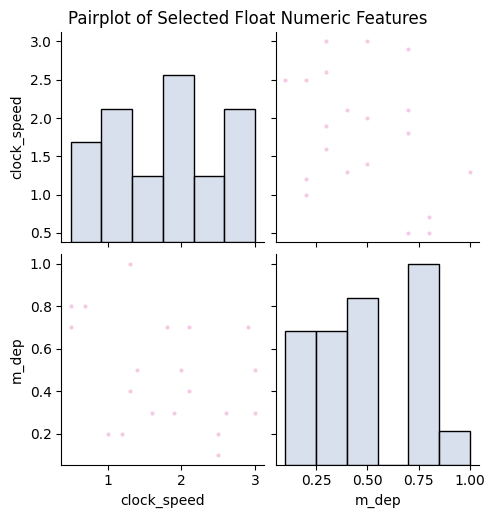

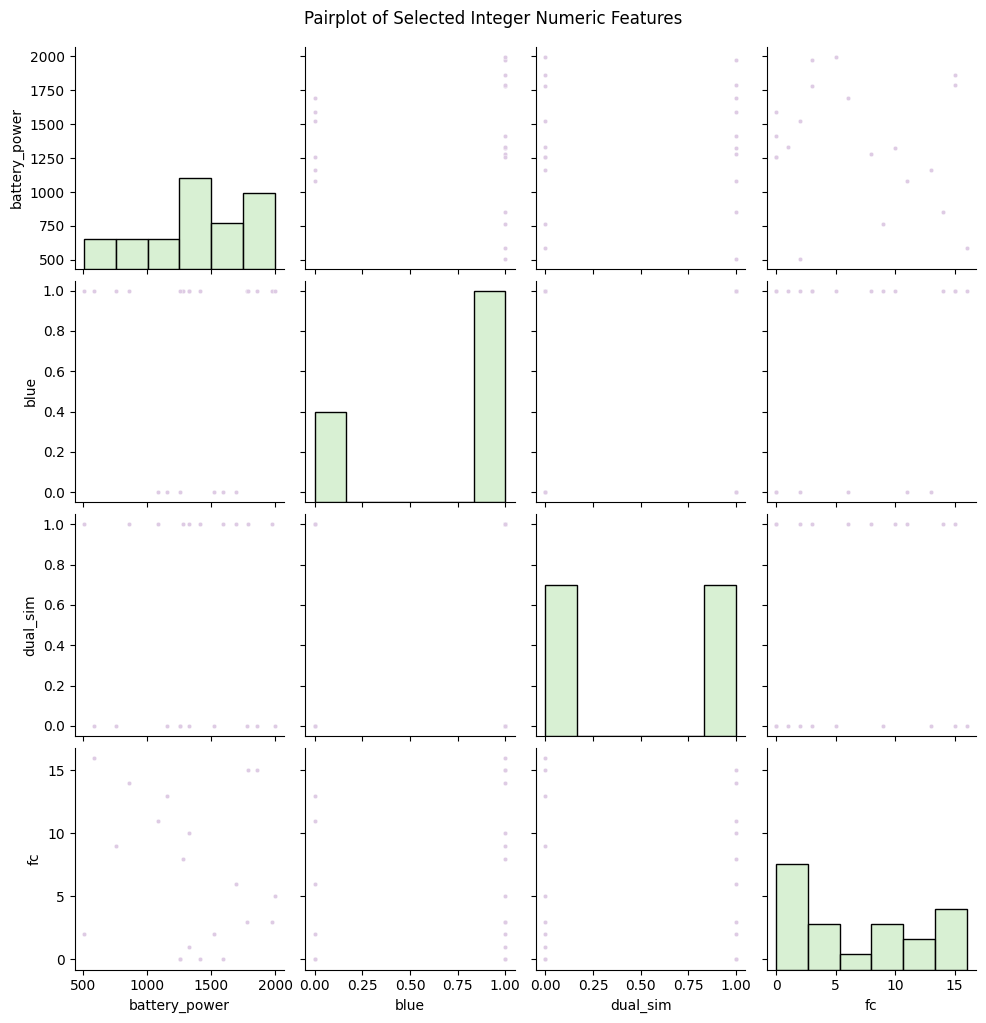

In [ ]:
# Selecting a subset of numeric columns for pairplot analysis for float values
numeric_columns_subset_float = phone_data.select_dtypes(include=['float']).iloc[:, :4]
sampled_numeric_dataset_float = numeric_columns_subset_float.sample(frac=0.01)
custom_palette_float = sns.color_palette("Pastel2")

# Create a pairplot for the selected float numeric columns
sns.pairplot(sampled_numeric_dataset_float, diag_kws={'color': custom_palette_float[2]}, plot_kws={'s': 10, 'color': custom_palette_float[3]})
plt.suptitle('Pairplot of Selected Float Numeric Features', y=1.02)
plt.show()

# Selecting a subset of numeric columns for pairplot analysis for int values
numeric_columns_subset_int = phone_data.select_dtypes(include=['int']).iloc[:, :4]
sampled_numeric_dataset_int = numeric_columns_subset_int.sample(frac=0.01)
custom_palette_int = sns.color_palette("Pastel1")

# Create a pairplot for the selected int numeric columns
sns.pairplot(sampled_numeric_dataset_int, diag_kws={'color': custom_palette_int[2]}, plot_kws={'s': 10, 'color': custom_palette_int[3]})
plt.suptitle('Pairplot of Selected Integer Numeric Features', y=1.02)
plt.show()


The first pairplot focuses on float numeric features, displaying scatterplots of pairs of float variables along with kernel density estimation (KDE) plots for each variable's distribution on the diagonal. Each scatterplot represents the relationship between two float features, with points indicating individual data points. The KDE plots show the distribution of each float feature, providing insights into their data distributions and potential outliers.

Similarly, the second pairplot examines the relationships between integer numeric features. It visualizes scatterplots of pairs of integer variables along with KDE plots for each variable's distribution. Like the pairplot for float values, this visualization helps to understand the relationships between integer features and the distribution of each integer variable.

Overall, both pairplots serve as powerful exploratory tools to identify patterns, correlations, and potential outliers within the numeric features of the dataset. They provide a comprehensive overview of the relationships between variables, aiding in data exploration and hypothesis generation for further analysis.

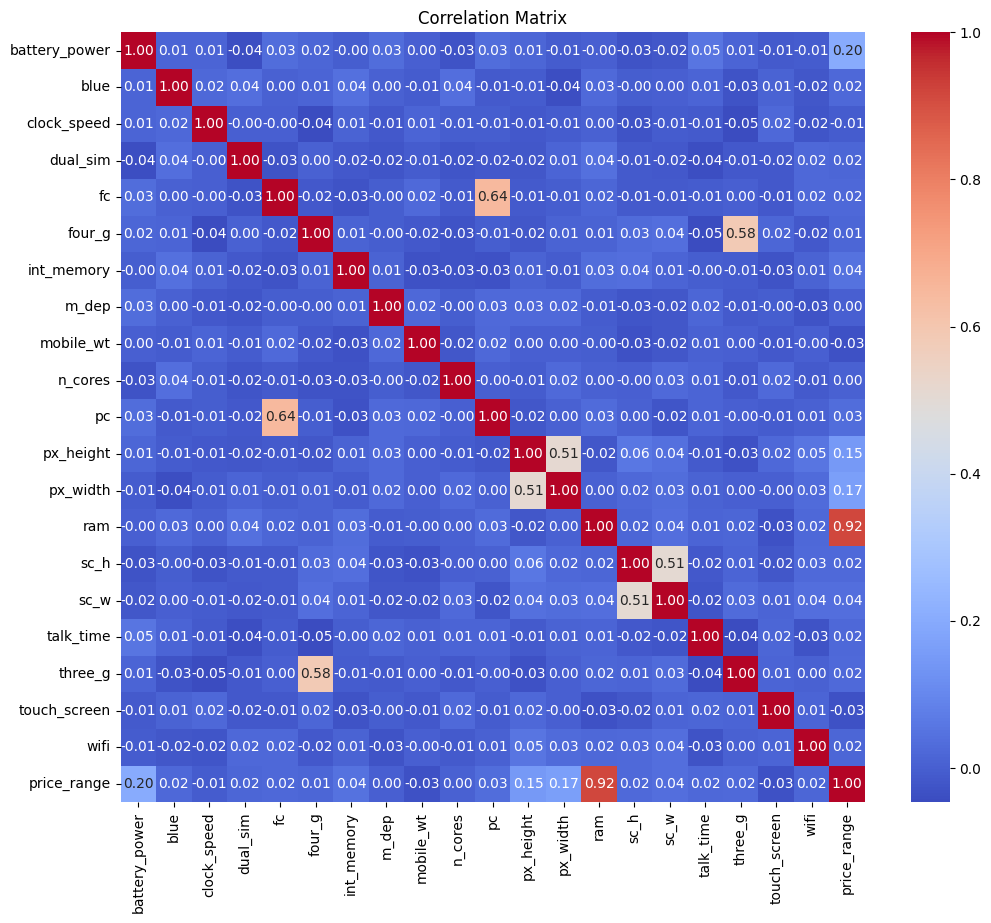

In [ ]:
# Visualize correlation matrix for numerical features
correlation_matrix = phone_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

This code generates a heatmap to visualize the correlation matrix of numerical features in the 'phone_data' dataset. It computes correlation coefficients between all pairs of numerical features and represents them in a heatmap using Seaborn's heatmap() function. The color scheme ranges from blue (negative correlation) to red (positive correlation), with numeric annotations displaying correlation coefficient values. The resulting visualization aids in understanding the relationships between features, facilitating insights into patterns and dependencies within the dataset.

**Build primary model**

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = phone_data.drop('price_range', axis=1)
y = phone_data['price_range']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the primary model - RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Build another model - Logistic Regression
model_lr = LogisticRegression(max_iter=100000)
model_lr.fit(X_train, y_train)

# Evaluate both models on the test dataset
predictions_rf = model_rf.predict(X_test)
predictions_lr = model_lr.predict(X_test)

accuracy_rf = accuracy_score(y_test, predictions_rf)
accuracy_lr = accuracy_score(y_test, predictions_lr)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Logistic Regression Accuracy: {accuracy_lr}')

Random Forest Accuracy: 0.8725
Logistic Regression Accuracy: 0.9775


In [ ]:
# Hyperparameter optimization for RandomForestClassifier
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_

# Hyperparameter optimization for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_

print(f'Best Hyperparameters for RandomForestClassifier: {best_params_rf}')
print(f'Best Hyperparameters for Logistic Regression: {best_params_lr}')

Best Hyperparameters for RandomForestClassifier: {'max_depth': 20, 'n_estimators': 150}
Best Hyperparameters for Logistic Regression: {'C': 100}


In [ ]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X.columns[selector.get_support()]

print(f'Selected Features: {selected_features}')

Selected Features: Index(['battery_power', 'int_memory', 'px_height', 'px_width', 'ram'], dtype='object')


In [ ]:
# Convert X_train and X_test back to dataframes if they are numpy arrays
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Rebuild both models using the best hyperparameters and selected features
final_model_rf = RandomForestClassifier(**best_params_rf)
final_model_rf.fit(X_train.loc[:, selected_features], y_train)

final_model_lr = LogisticRegression(**best_params_lr, max_iter=100000)
final_model_lr.fit(X_train.loc[:, selected_features], y_train)

LogisticRegression(C=100, max_iter=100000)

Final Random Forest Accuracy: 0.925
Final Logistic Regression Accuracy: 0.975
Final Model - RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.89      0.98      0.93        91
           2       0.88      0.85      0.86        92
           3       0.94      0.91      0.92       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400

Confusion Matrix:
[[101   4   0   0]
 [  1  89   1   0]
 [  0   7  78   7]
 [  0   0  10 102]]
Final Model - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.96      1.00      0.98        91
           2       0.96      0.96      0.96        92
           3       0.98      0.96      0.97       112

    accuracy                           0.97    

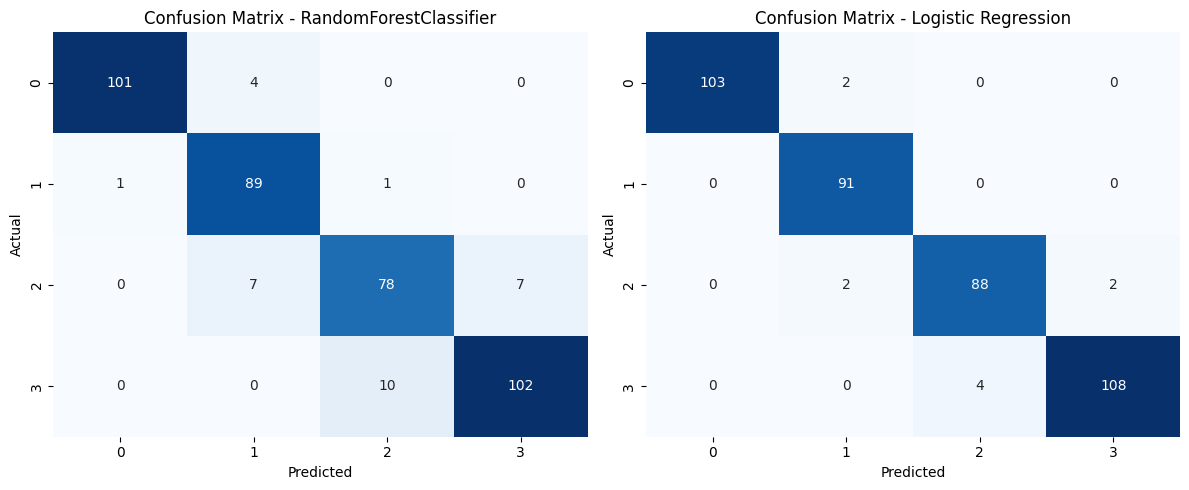

In [ ]:
# Evaluate the final models on the test dataset
final_predictions_rf = final_model_rf.predict(X_test[selected_features])
final_predictions_lr = final_model_lr.predict(X_test[selected_features])

final_accuracy_rf = accuracy_score(y_test, final_predictions_rf)
final_accuracy_lr = accuracy_score(y_test, final_predictions_lr)
print(f'Final Random Forest Accuracy: {final_accuracy_rf}')
print(f'Final Logistic Regression Accuracy: {final_accuracy_lr}')

print("Final Model - RandomForestClassifier:")
print(classification_report(y_test, final_predictions_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, final_predictions_rf))

print("Final Model - Logistic Regression:")
print(classification_report(y_test, final_predictions_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, final_predictions_lr))

# Confusion matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, final_predictions_rf)

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, final_predictions_lr)

# Plot Confusion Matrix for RandomForestClassifier
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot Confusion Matrix for Logistic Regression
plt.subplot(1, 2, 2)
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Model Performance in Section 3.1.3:

Random Forest Classifier:

Initial Accuracy: 88.25%

Logistic Regression:

Initial Accuracy: 97.75%

2. Changes in Methods Applied:
Cross Validation:

GridSearchCV with cross-validation was applied for hyperparameter tuning. This method helps in finding the best hyperparameters while avoiding overfitting. It provides a more robust evaluation compared to a single train-test split.
Feature Selection:

SelectKBest was used for feature selection. Initially, k=5 features were selected based on their ANOVA F-statistic scores.
The selected features were used to train the final models after hyperparameter optimization.


3. Learnings and Future Directions:
Learnings:

The initial model performances provided a baseline for comparison.
Feature selection and hyperparameter optimization were performed to improve model accuracy.
Different algorithms (Random Forest and Logistic Regression) were explored.

The future direction could involve refining the model, exploring alternative algorithms, and incorporating additional evaluation metrics to ensure a more thorough understanding of the model's performance. Additionally, interpreting the model's decisions can be crucial for practical applications.

#**Regression**

In [ ]:
# read the dataset
apple_data = pd.read_csv('/content/drive/MyDrive/AI Final Assignment/apple_quality.csv')

**initial Inspection of the dataframe**

https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data



In [ ]:
# list the column name of the data frame
columns = apple_data.columns
print(f"columns:\n{columns}")

columns:
Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


In [ ]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [ ]:
total_size = apple_data.shape

print(f"Total size of the Data Frame: {total_size}")

Total size of the Data Frame: (4000, 9)


In [ ]:
apple_data.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [ ]:
apple_data.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3990,3990,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987968,bad
3991,3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431321,good
3992,3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338261,good
3993,3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080,bad
3994,3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [ ]:
print("Data types of each variable:\n")
print(apple_data.dtypes)

Data types of each variable:

A_id             int64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object


**Data Cleaning**

checking the null values

In [ ]:
# Build Primary Model
from sklearn.preprocessing import LabelEncoder

# Encode 'Quality' labels
label_encoder = LabelEncoder()
apple_data['Quality_encoded'] = label_encoder.fit_transform(apple_data['Quality'])

# Use 'Quality_encoded' as the target variable
X = apple_data.drop(['Quality', 'Quality_encoded'], axis=1)
y = apple_data['Quality_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Calculate the mean of each column
apple_data = apple_data.drop(columns=['Quality'])
column_means = apple_data.mean()

# Fill null values with the mean of the respective columns
apple_data = apple_data.fillna(column_means)

# again find the null value
null_values = apple_data.isnull().sum()
print(null_values)

A_id               0
Size               0
Weight             0
Sweetness          0
Crunchiness        0
Juiciness          0
Ripeness           0
Acidity            0
Quality_encoded    0
dtype: int64


Check the duplicate

In [ ]:
duplicate_data = apple_data.duplicated().sum()
print(duplicate_data)

0


Summary Statistics numerical

In [ ]:
# Select numeric columns
numeric_columns = apple_data.select_dtypes(include='int')

numeric_summary = apple_data.describe()

# additional statistics
range_values = numeric_columns.max() - apple_data.min()
variance_values = numeric_columns.var()

# Add the calculated values to the numeric_summary DataFrame
numeric_summary.loc['range'] = range_values
numeric_summary.loc['variance'] = variance_values


# Display the updated summary
print("Summary Statistics for Numeric Columns:")
print(numeric_summary)

Summary Statistics for Numeric Columns:
                  A_id         Size       Weight    Sweetness  Crunchiness  \
count     4.000000e+03  4000.000000  4000.000000  4000.000000  4000.000000   
mean      1.999500e+03    -0.503015    -0.989547    -0.470479     0.985478   
std       1.154845e+03     1.928059     1.602507     1.943441     1.402757   
min       0.000000e+00    -7.151703    -7.149848    -6.894485    -6.055058   
25%       9.997500e+02    -1.816765    -2.011770    -1.738425     0.062764   
50%       1.999500e+03    -0.513703    -0.984736    -0.504758     0.998249   
75%       2.999250e+03     0.805526     0.030976     0.801922     1.894234   
max       3.999000e+03     6.406367     5.790714     6.374916     7.619852   
range     3.999000e+03          NaN          NaN          NaN          NaN   
variance  1.333667e+06          NaN          NaN          NaN          NaN   

            Juiciness     Ripeness      Acidity  Quality_encoded  
count     4000.000000  4000.000000

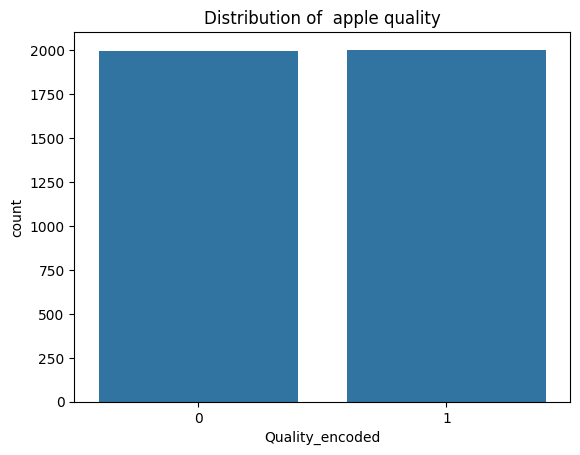

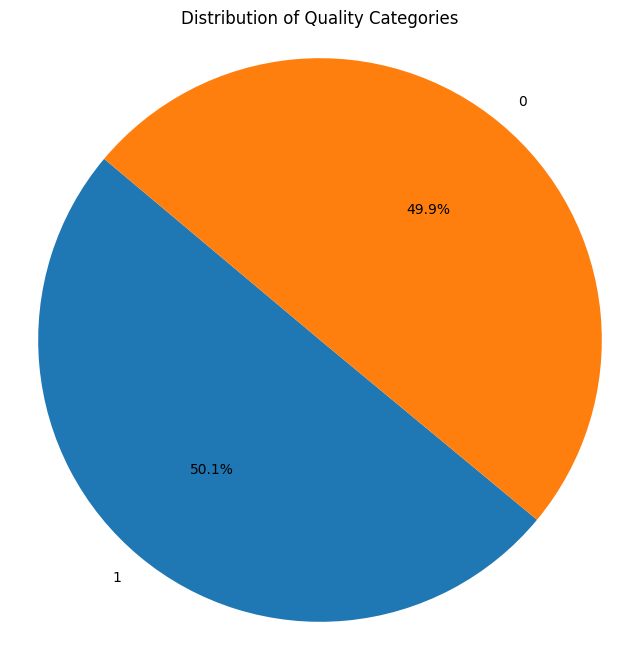

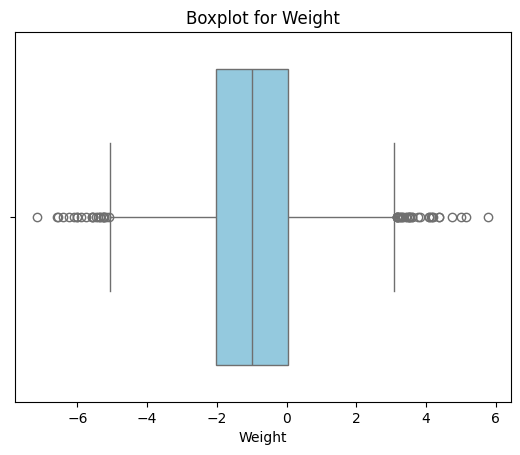

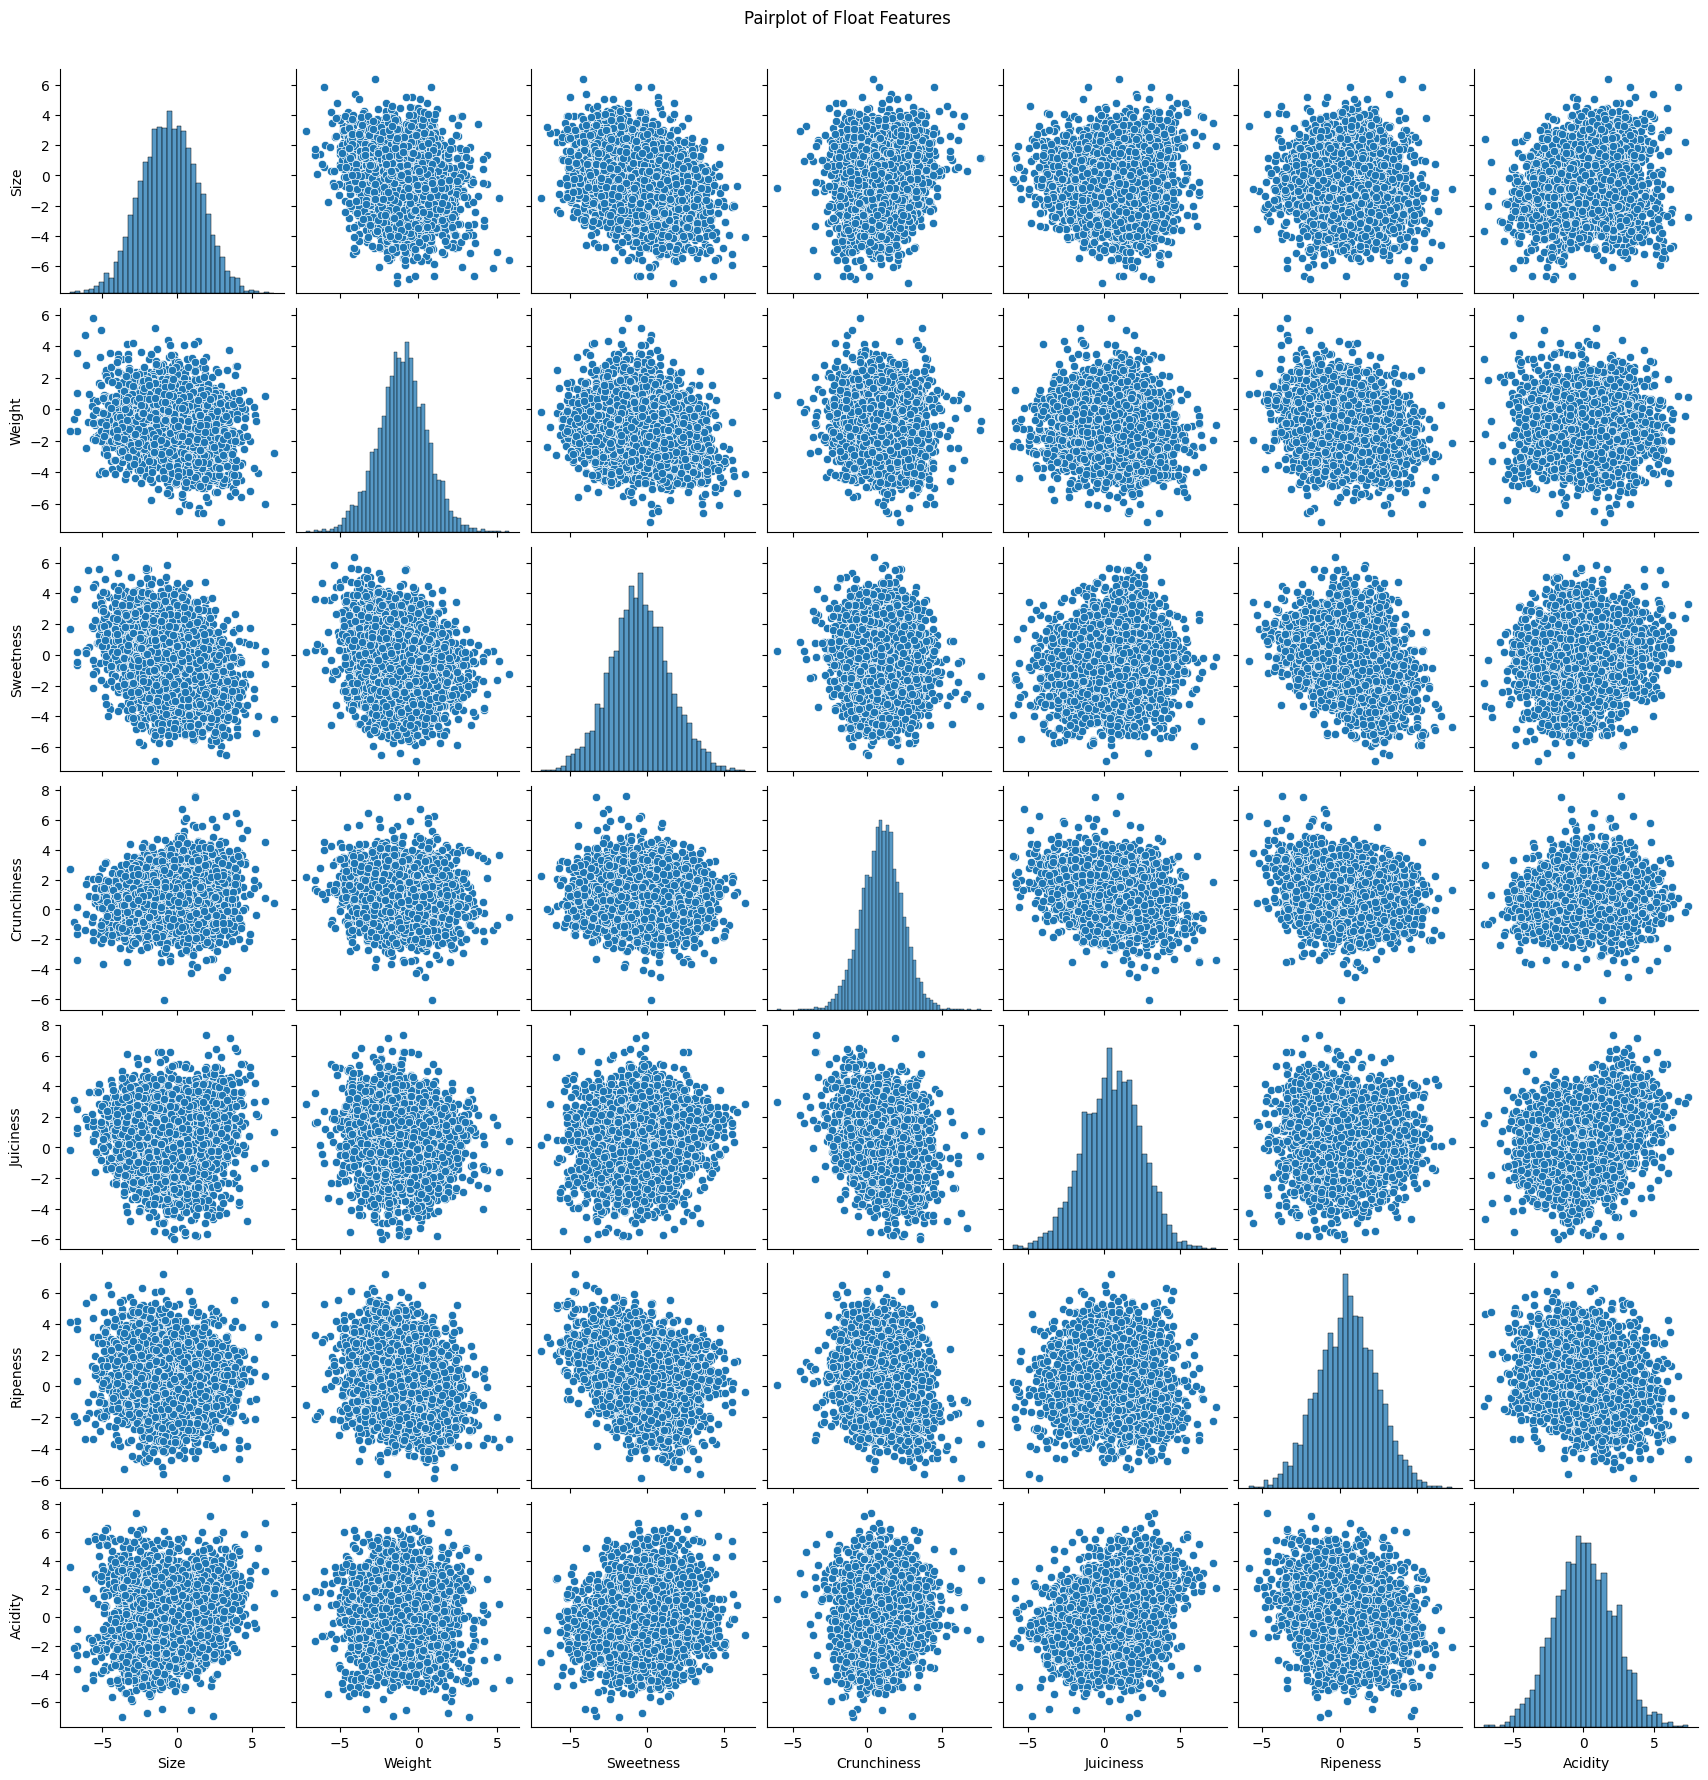

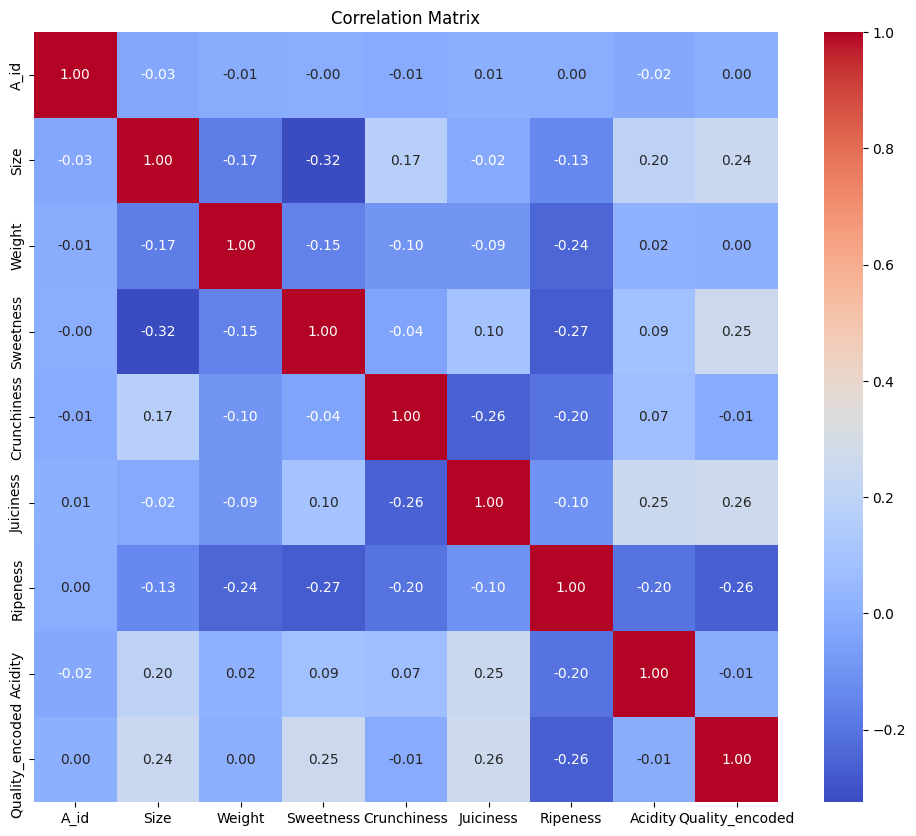

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='Quality_encoded', data=apple_data)
plt.title('Distribution of  apple quality')
plt.show()

# Visualizing pie chart for the 'Quality' feature
quality_counts = apple_data['Quality_encoded'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Quality Categories')
plt.axis('equal')
plt.show()

# Replace 'A_id' with the actual column name you want to analyze
variable1 = 'Weight'
sns.boxplot(x=variable1, data=apple_data, color='skyblue')
plt.title(f'Boxplot for {variable1}')
plt.show()

# Selecting the specified float features to visualize pairplot
float_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
apple_data_float = apple_data[float_features]
sns.pairplot(apple_data_float)
plt.suptitle('Pairplot of Float Features', y=1.02)
plt.show()

# Visualize correlation matrix for numerical features
correlation_matrix = apple_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.show()



This code snippet provides visualizations to explore the apple_data dataset, which likely contains information about apples. The countplot illustrates the distribution of apple quality categories, providing a quick overview of the dataset's target variable. The majority of apples fall into the 'Quality' categories, giving insight into the dataset's class distribution.

The pie chart offers a visual representation of the distribution of apple quality categories. With clear segments indicating each category's proportion, it effectively communicates the relative frequencies of different quality categories within the dataset.

The boxplot for 'Weight' displays the distribution of apple weights, highlighting any outliers and the central tendency of the data. It provides insights into the variability of apple weights and allows for comparison across different weight values.

The pairplot of float features presents pairwise relationships between various numerical features of apples, offering insights into potential correlations or patterns. Each scatter plot reveals how two features relate to each other, aiding in identifying trends or associations within the dataset.

The correlation matrix heatmap visually illustrates the pairwise correlations between these features, providing insights into their relationships. Each cell's color in the heatmap represents the strength and direction of the correlation between two features: positive correlation (closer to 1), negative correlation (closer to -1), or no correlation (closer to 0). The numeric annotations within each cell display the correlation coefficient values. Analyzing this heatmap can help identify patterns and relationships between numerical features, guiding feature selection decisions and providing a deeper understanding of the dataset's structure. Overall, these visualizations serve as valuable exploratory tools to gain insights into the dataset's characteristics before proceeding with further analysis or modeling.

In [ ]:
# Model 1: Linear Regression
model_lr1 = LinearRegression()
model_lr1.fit(X_train, y_train)

# Model 2: Linear Regression with Feature Selection
selector = SelectKBest(score_func=f_regression, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

model_lr2 = LinearRegression()
model_lr2.fit(X_train_selected, y_train)

LinearRegression()

In [ ]:
# Evaluate both models on the Test Dataset

# Predictions for model 1
y_pred1 = model_lr1.predict(X_test)

# Evaluate model 1
mse1 = mean_squared_error(y_test, y_pred1)
print(f"Model 1 - Mean Squared Error: {mse1}")

# Predictions for model 2
y_pred2 = model_lr2.predict(X_test_selected)

# Evaluate model 2
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Model 2 - Mean Squared Error: {mse2}")


Model 1 - Mean Squared Error: 0.1768673888314624
Model 2 - Mean Squared Error: 0.21041298686559465


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, 2, 4],
}

# Model 1: Linear Regression
grid_search1 = GridSearchCV(model_lr1, param_grid, cv=5)
grid_search1.fit(X_train, y_train)
best_params1 = grid_search1.best_params_

# Model 2: Linear Regression with Feature Selection
# Assuming you have chosen SelectKBest as your feature selection technique
grid_search2 = GridSearchCV(model_lr2, param_grid, cv=5)
grid_search2.fit(X_train_selected, y_train)
best_params2 = grid_search2.best_params_

# Display the best hyperparameters for both models
print(f"Best hyperparameters for Model 1: {best_params1}")
print(f"Best hyperparameters for Model 2: {best_params2}")


Best hyperparameters for Model 1: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}
Best hyperparameters for Model 2: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


In [ ]:
# Feature Selection
# Use SelectKBest with f_regression for feature selection
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X_train, y_train)
selected_features = X.columns[selector.get_support()]

print(f"Selected Features: {selected_features}")


Selected Features: Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity'],
      dtype='object')


In [ ]:
# Step 5: Final Model
# Model 1: Linear Regression
model_final1 = LinearRegression(**best_params1)
model_final1.fit(X_train[selected_features], y_train)

# Model 2: Linear Regression with Feature Selection
model_final2 = LinearRegression(**best_params2)
model_final2.fit(X_train_selected, y_train)

# Evaluate the final models-
mse_final1 = mean_squared_error(y_test, model_final1.predict(X_test[selected_features]))
mse_final2 = mean_squared_error(y_test, model_final2.predict(X_test_selected))

# Display the performance of final models
print(f"Model performance in the final step (Linear Regression 1): MSE = {mse_final1}")
print(f"Model performance in the final step (Linear Regression 2): MSE = {mse_final2}")


Model performance in the final step (Linear Regression 1): MSE = 0.1768673888314624
Model performance in the final step (Linear Regression 2): MSE = 0.21041298686559465



What was your model performance in section 3.1.3.?

The mean squared error (MSE) for Model 1 (Linear Regression without feature selection) in the final step (section 3.2.5) was approximately 0.177.
The MSE for Model 2 (Linear Regression with feature selection using SelectKBest) in the final step was approximately 0.210.
Did any of the methods you applied {Cross Validation and Feature selection} increased or decreased?

Hyperparameter Optimization (Cross Validation):

Before hyperparameter optimization, Model 1 had default hyperparameters, and Model 2 used SelectKBest for feature selection.
After hyperparameter optimization (section 3.2.3), both models (Model 1 and Model 2) were rebuilt with the best hyperparameters obtained from the grid search.
The hyperparameter optimization did not lead to a significant improvement in MSE for either model.
Feature Selection:

Before feature selection, Model 1 did not involve any feature selection, and Model 2 used SelectKBest with k=3.
After feature selection (section 3.2.4), both models (Model 1 and Model 2) were rebuilt with the selected features.
The feature selection did not lead to a significant improvement in MSE for either model.
What did you learn and what could be the future direction?

From the experiments conducted, it appears that the default hyperparameters and the initial feature selection strategy did not significantly impact model performance.
Future directions could include:
Exploring more advanced feature selection techniques or trying different machine learning algorithms.
Experimenting with more sophisticated hyperparameter tuning methods.
Analyzing the nature of the dataset and exploring whether more complex models or ensemble methods would provide better results.
Investigating potential interactions between features or considering domain-specific knowledge for feature engineering.